In [40]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 3.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 4.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


# Import Libs

In [44]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(rc={'figure.figsize':(11.7,8.27)})

# read csv data

In [4]:
df = pd.read_csv("CW1_data_202223.csv")

In [5]:
df.head()

id  Gender   Age  HasDrivingLicense  RegionID  Switch VehicleAge  \
0  332804  Female  39.0                1.0      15.0     0.0   1-2 Year   
1  116249    Male  38.0                1.0      11.0     NaN   1-2 Year   
2  255006    Male  22.0                1.0      30.0     NaN   < 1 Year   
3  317475  Female  23.0                1.0       NaN     NaN   < 1 Year   
4  344213    Male  56.0                1.0      48.0     0.0  > 2 Years   

  PastAccident AnnualPremium  SalesChannelID  DaysSinceCreated  Result  
0          NaN    £2,645.30               55               227       1  
1          NaN    £1,151.90               26                29       0  
2          NaN    £2,265.90              152               166       0  
3          NaN    £1,456.60              151               277       0  
4          NaN      £131.50              154               155       0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             304887 non-null  int64  
 2   Age                304887 non-null  float64
 3   HasDrivingLicense  304887 non-null  float64
 4   RegionID           304887 non-null  float64
 5   Switch             304887 non-null  float64
 6   VehicleAge         304887 non-null  int64  
 7   PastAccident       304887 non-null  int64  
 8   AnnualPremium      304887 non-null  float64
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 27.9 MB


In [11]:
df.columns[df.isnull().any()]

Index(['Age', 'HasDrivingLicense', 'RegionID', 'Switch', 'VehicleAge',
       'PastAccident'],
      dtype='object')

In [8]:
df.Gender = df.Gender.fillna('idk')

In [19]:
df.HasDrivingLicense.unique()

array([ 1., nan,  0.])

In [10]:
le = preprocessing.LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])

In [15]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [20]:
df.HasDrivingLicense = df.HasDrivingLicense.fillna(-1)

In [21]:
df.HasDrivingLicense.unique()

array([ 1., -1.,  0.])

In [24]:
df.RegionID = df.RegionID.fillna(-1)

In [27]:
df.Switch = df.Switch.fillna(-1)

In [30]:
df.PastAccident = df.PastAccident.fillna('idk')
le = preprocessing.LabelEncoder()
df['PastAccident']= le.fit_transform(df['PastAccident'])

In [33]:
df.VehicleAge = df.VehicleAge.fillna('idk')
le = preprocessing.LabelEncoder()
df['VehicleAge']= le.fit_transform(df['VehicleAge'])

In [37]:
df['AnnualPremium'] = df['AnnualPremium'].apply(lambda x: float(x.replace("£","").replace(",","").strip()))
df.head()

id  Gender   Age  HasDrivingLicense  RegionID  Switch  VehicleAge  \
0  332804       0  39.0                1.0      15.0     0.0           0   
1  116249       1  38.0                1.0      11.0    -1.0           0   
2  255006       1  22.0                1.0      30.0    -1.0           1   
3  317475       0  23.0                1.0      -1.0    -1.0           1   
4  344213       1  56.0                1.0      48.0     0.0           2   

   PastAccident  AnnualPremium  SalesChannelID  DaysSinceCreated  Result  
0             2         2645.3              55               227       1  
1             2         1151.9              26                29       0  
2             2         2265.9             152               166       0  
3             2         1456.6             151               277       0  
4             2          131.5             154               155       0

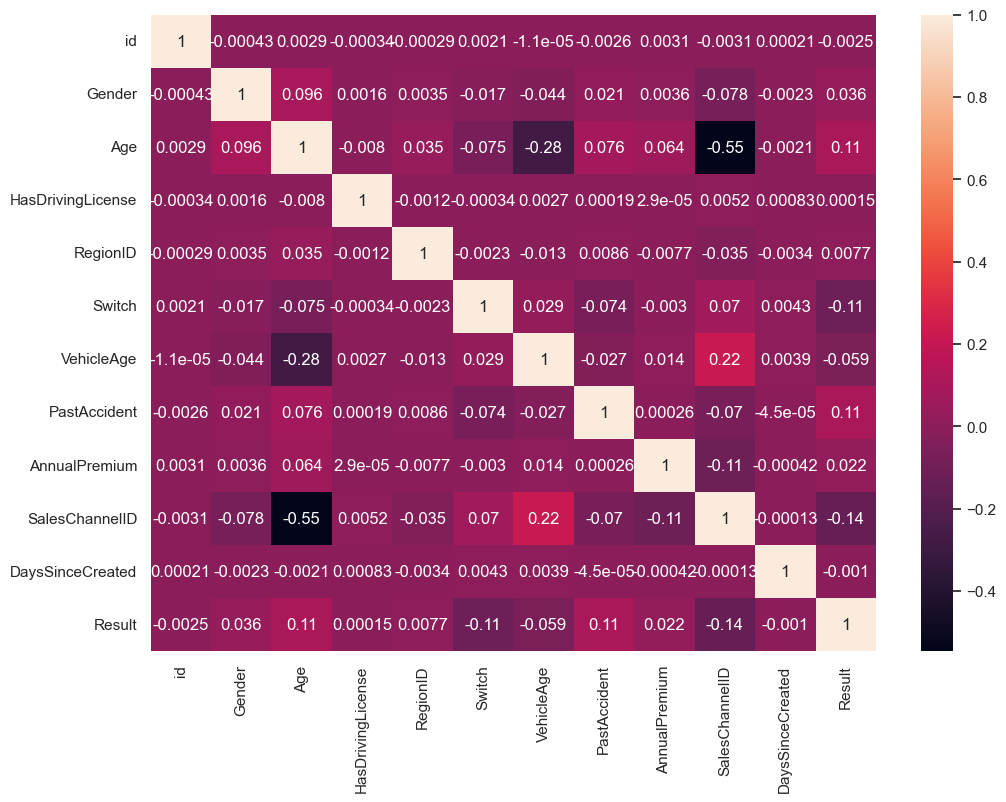

In [45]:
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

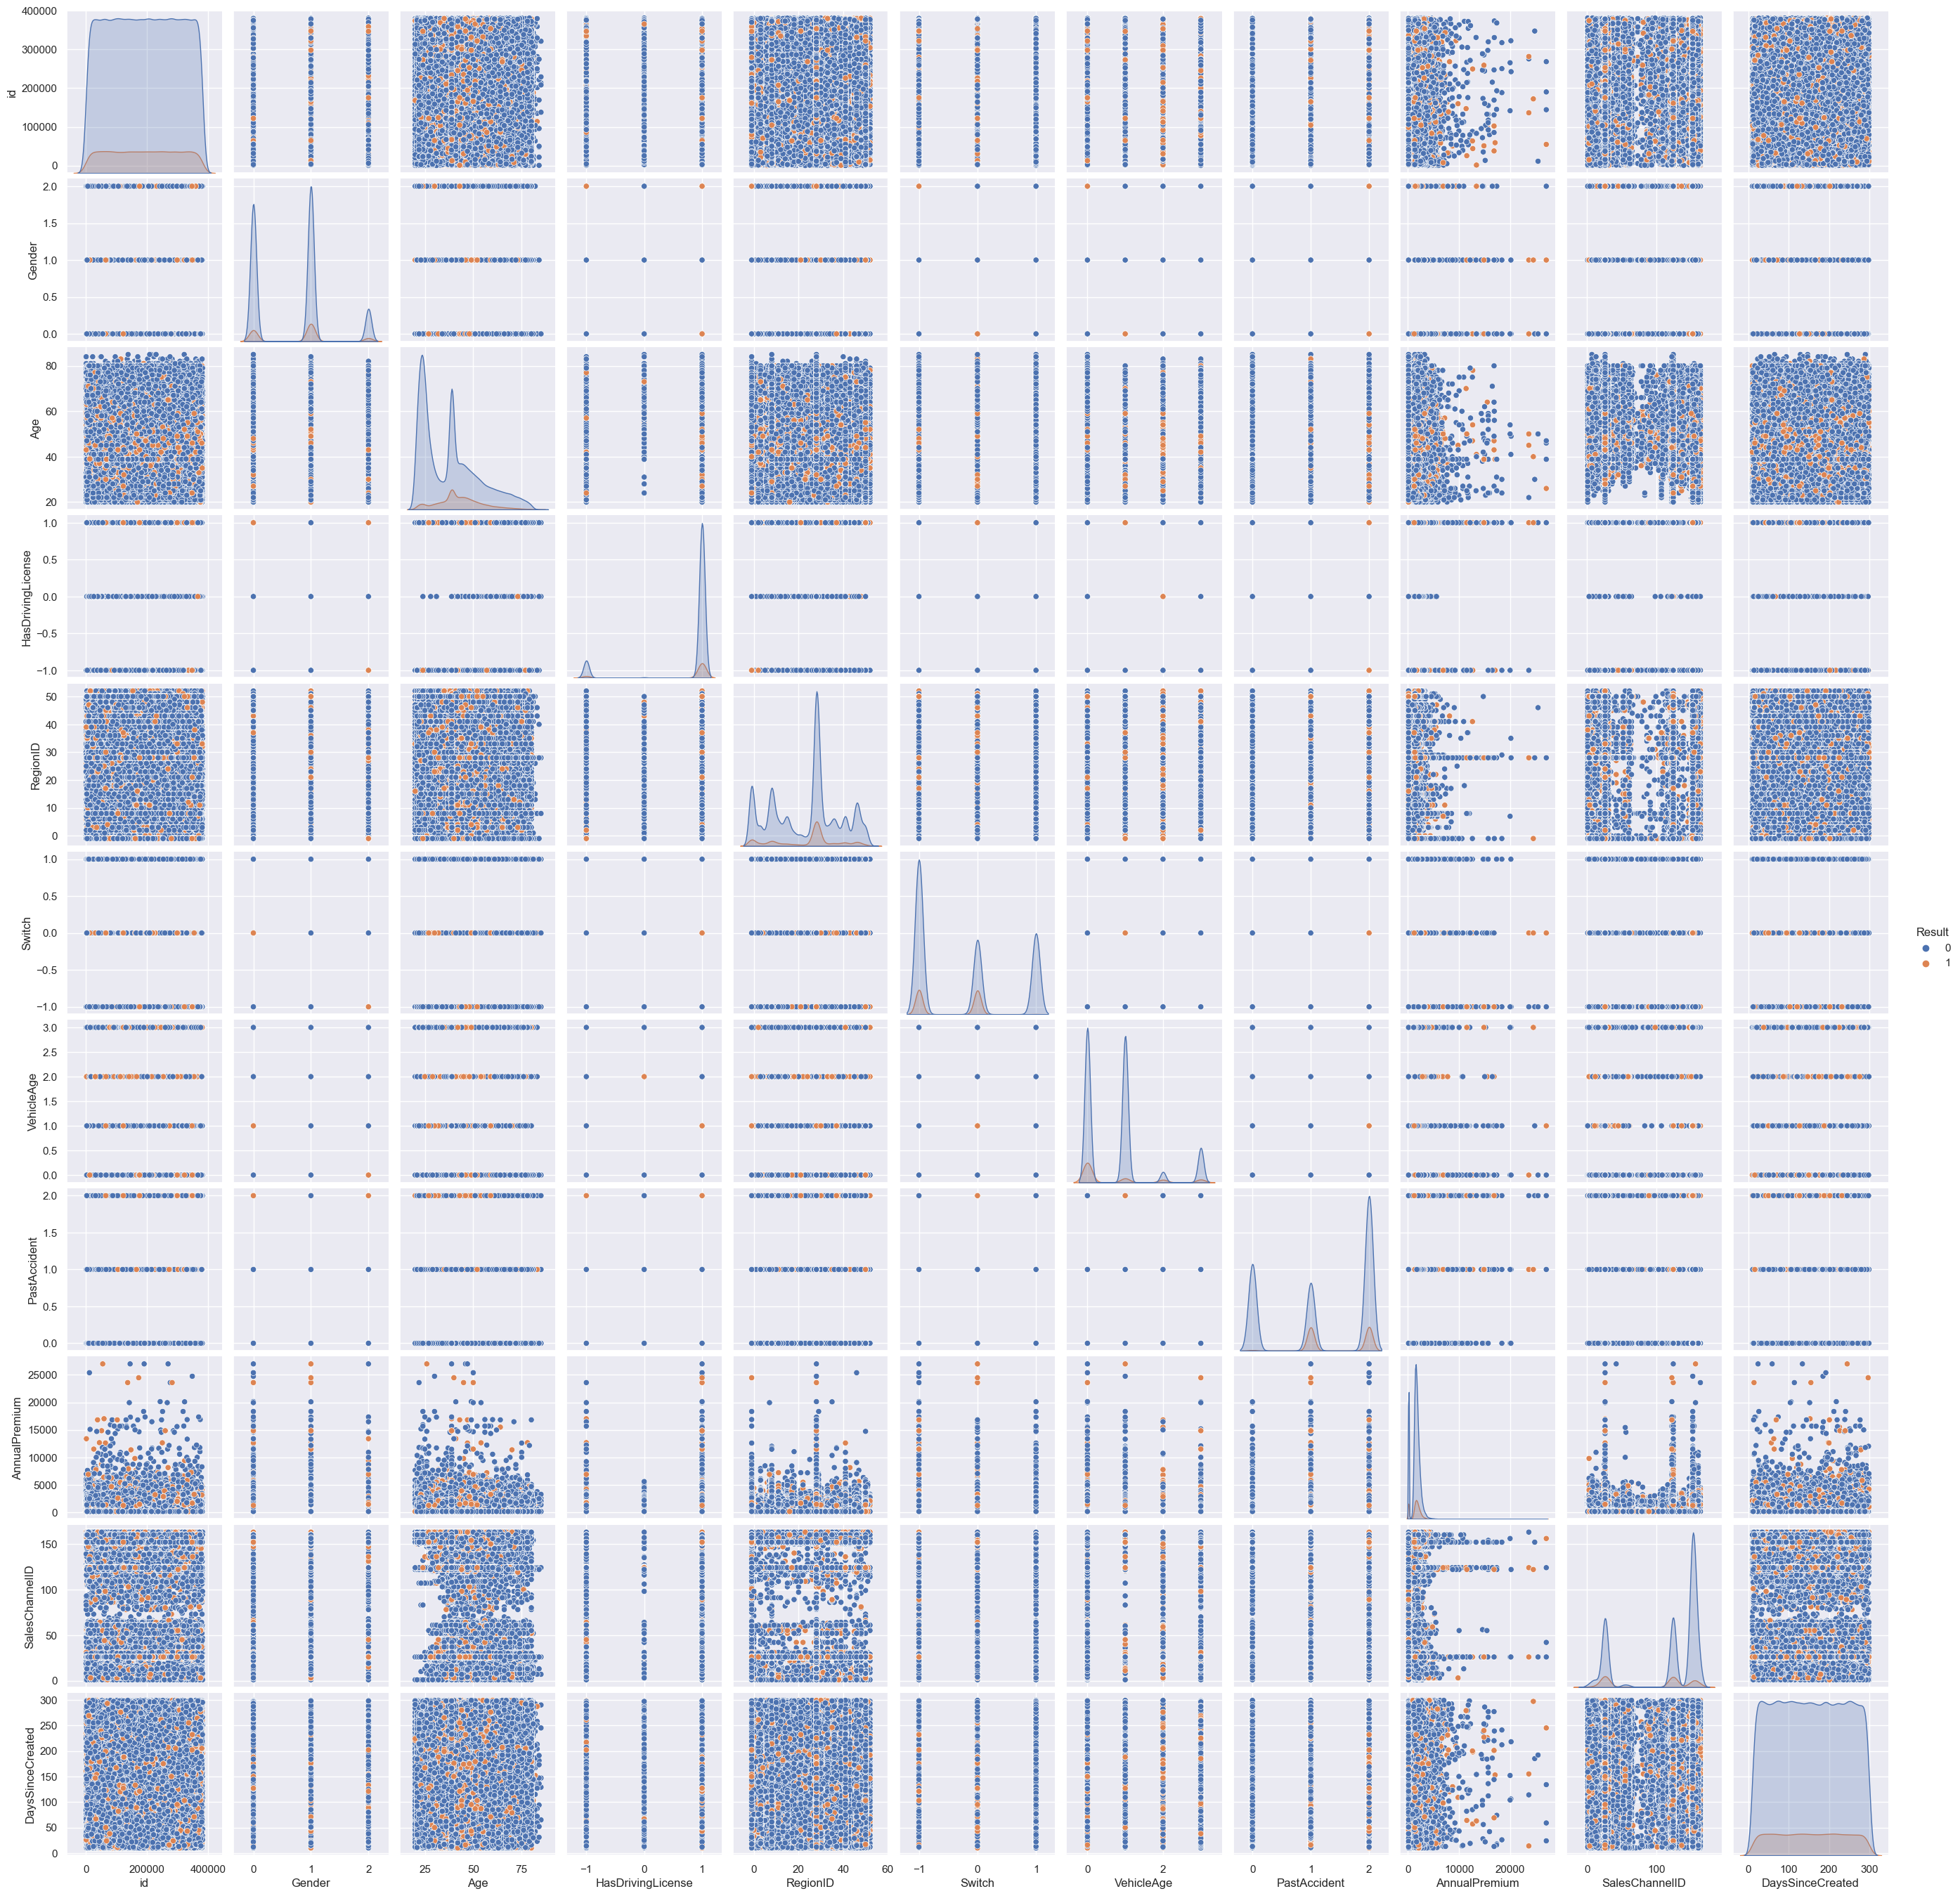

In [48]:
sn.pairplot(df, hue="Result")


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X= df[['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch', 'VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID', 'DaysSinceCreated']]
y= df['Result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))




ACCURACY OF THE MODEL:  0.8720631484579138


In [50]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.88255183 0.36481382]
recall: [0.98533626 0.06035175]
fscore: [0.93111608 0.10356979]
support: [80266 11201]


In [51]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 3.0 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies 